# Building a Predictive Model to predict the Sales of a given retail store.

In [209]:
workdata <- read.csv("RetailStoreSalesData.csv")           #Import data set

In [210]:
summary(workdata)            #Check the statistical informations

    OrderID       OrderDate          CustomerID         EmployeeID       
 Min.   :10248   Length:2289        Length:2289        Length:2289       
 1st Qu.:10463   Class :character   Class :character   Class :character  
 Median :10684   Mode  :character   Mode  :character   Mode  :character  
 Mean   :10696                                                           
 3rd Qu.:10908                                                           
 Max.   :11367                                                           
   ShipperID      ProductID         Sales              Costs         
 Min.   :1.00   Min.   : 1.00   Min.   :    2.12   Min.   :    1.83  
 1st Qu.:2.00   1st Qu.:21.00   1st Qu.:  151.58   1st Qu.:  122.21  
 Median :2.00   Median :41.00   Median :  351.72   Median :  282.10  
 Mean   :1.99   Mean   :40.68   Mean   :  819.13   Mean   :  652.71  
 3rd Qu.:2.00   3rd Qu.:60.00   3rd Qu.:  788.10   3rd Qu.:  634.13  
 Max.   :3.00   Max.   :77.00   Max.   :43755.12   Max.   :321

In [211]:
head(workdata)               #View the data set 

,OrderID,OrderDate,CustomerID,EmployeeID,ShipperID,ProductID,Sales,Costs,Profit,Quantity,Discount,Freight
,<int>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1,10251,3/3/19,CST1,EMP7,2,22,21.36,16.84,4.52,6,1.02,43.41
2,10251,3/3/19,CST1,EMP7,2,57,332.64,288.14,44.50,15,15.84,43.41
3,10251,3/3/19,CST1,EMP7,2,65,185.20,156.44,28.76,20,0.00,43.41
4,10277,11/5/19,CST1,EMP7,2,28,889.60,768.61,120.99,20,0.00,77.65
5,10277,11/5/19,CST1,EMP7,2,62,360.96,311.87,49.09,12,0.00,77.65
6,10289,11/21/18,CST1,EMP8,2,3,616.20,532.40,83.80,30,0.00,25.25


In [212]:
table(is.na(workdata))            #Check for Nulls or NAs


FALSE 
27468 

In [213]:
cleandata <- workdata[-c(1,3:6,11)]               #Delete unnecessary columns

In [214]:
cleandata              #Check data set again after cleaning

OrderDate,Sales,Costs,Profit,Quantity,Freight
<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
3/3/19,21.36,16.84,4.52,6,43.41
3/3/19,332.64,288.14,44.50,15,43.41
3/3/19,185.20,156.44,28.76,20,43.41
11/5/19,889.60,768.61,120.99,20,77.65
11/5/19,360.96,311.87,49.09,12,77.65
11/21/18,616.20,532.40,83.80,30,25.25
11/21/18,320.40,276.83,43.57,9,25.25
11/23/19,131.40,113.53,17.87,20,58.77
11/23/19,1890.45,1633.35,257.10,15,58.77


In [215]:
summary(cleandata)           #Check the statistical informations

  OrderDate             Sales              Costs              Profit        
 Length:2289        Min.   :    2.12   Min.   :    1.83   Min.   :    0.27  
 Class :character   1st Qu.:  151.58   1st Qu.:  122.21   1st Qu.:   24.99  
 Mode  :character   Median :  351.72   Median :  282.10   Median :   63.04  
                    Mean   :  819.13   Mean   :  652.71   Mean   :  166.42  
                    3rd Qu.:  788.10   3rd Qu.:  634.13   3rd Qu.:  145.56  
                    Max.   :43755.12   Max.   :32160.01   Max.   :11595.11  
    Quantity        Freight     
 Min.   :  1.0   Min.   :12.45  
 1st Qu.: 10.0   1st Qu.:35.04  
 Median : 20.0   Median :50.67  
 Mean   : 23.9   Mean   :50.48  
 3rd Qu.: 30.0   3rd Qu.:65.53  
 Max.   :150.0   Max.   :79.96  

In [216]:
cor.test(cleandata$Sales, cleandata$Costs)           #Test for correlation between Sales and Cost variables 


	Pearson's product-moment correlation

data:  cleandata$Sales and cleandata$Costs
t = 522.77, df = 2287, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9954873 0.9961685
sample estimates:
      cor 
0.9958418 


# The correlation test has statistically proven that there is a strong positive relationship between the Sales and Costs variables so we can now build a model.

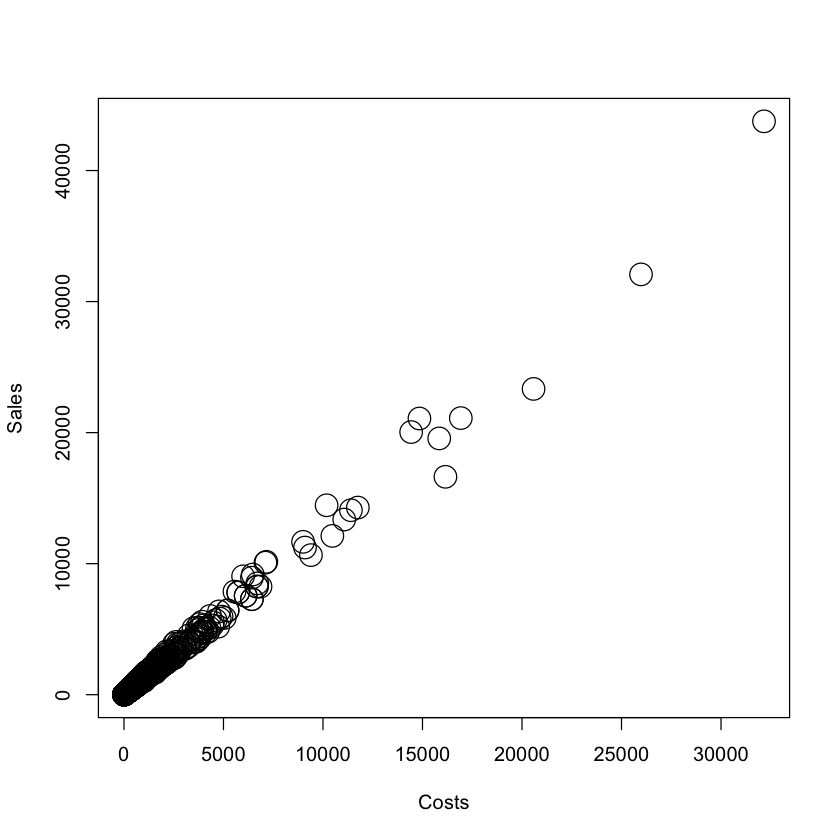

In [217]:
plot (Sales ~ Costs, cex = 2.5, data = cleandata)             # Visualize data set

# The relationship between the Sales and Costs variables is linear so the best model will be the Simple Linear Regression Model

In [218]:
install.packages("caTools")             #Install the necessary package to divide data into Train and Test
library (caTools)

sample.split(cleandata$Sales, SplitRatio = 0.75) -> datadiv 

subset(cleandata, datadiv == T) -> Traindata           #Training Set
subset(cleandata, datadiv == F) -> Testdata            #Testing Set



The downloaded binary packages are in
	/var/folders/nq/2glsbgzj51lg_zhnk4ch8hr00000gn/T//RtmpDJS1Zz/downloaded_packages


In [219]:
modeldata <- lm(Sales ~ Costs, data = Traindata)            #Linear Regression Model build

In [220]:
summary(modeldata)              #Check and confirm some other details about the model


Call:
lm(formula = Sales ~ Costs, data = Traindata)

Residuals:
     Min       1Q   Median       3Q      Max 
-2042.25   -26.25   -10.30     5.00  1896.12 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.417414   3.498227   2.978  0.00294 ** 
Costs        1.232510   0.002288 538.799  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 131.9 on 1714 degrees of freedom
Multiple R-squared:  0.9941,	Adjusted R-squared:  0.9941 
F-statistic: 2.903e+05 on 1 and 1714 DF,  p-value: < 2.2e-16


In [221]:
predict(modeldata, newdata = Testdata) -> pred_data              #Validate on the Testing data set

In [222]:
cbind(actualvalues = Testdata$Sales, predictedvalues = pred_data) -> modelfinal         #Combine in one dataframe

In [223]:
as.data.frame(modelfinal) -> modelconf             #Change datatype for computation reason

((modelconf$actualvalues - modelconf$predictedvalues) / modelconf$actualvalues ) -> PredError     #Prediction Error


In [224]:
cbind(modelconf, PredError) -> finalset            #Combine dataframes together 

finalset           #Display combined results

,actualvalues,predictedvalues,PredError
,<dbl>,<dbl>,<dbl>
8,131.40,150.34427,-0.144172546
11,134.90,154.06645,-0.142078967
15,203.07,217.65164,-0.071805991
17,4764.24,4872.41047,-0.022704665
19,179.68,169.86723,0.054612474
20,262.40,278.20486,-0.060231929
28,47.49,52.22415,-0.099687360
31,27.88,32.67654,-0.172042481
32,385.00,408.50581,-0.061054061


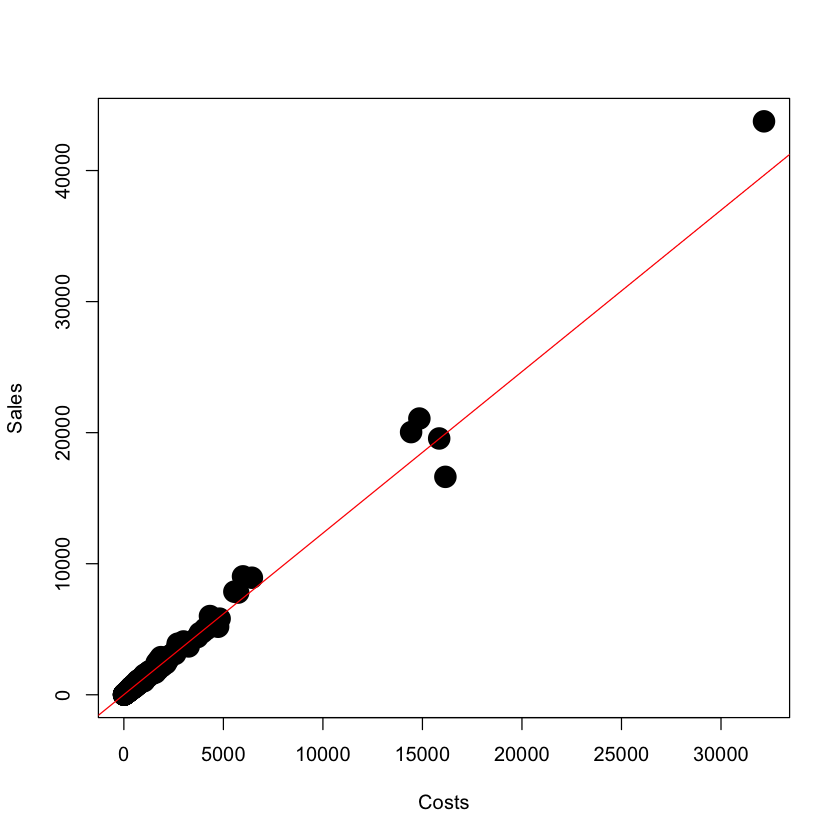

In [225]:
plot (Sales ~ Costs, cex = 2.5, pch = 16, data = Testdata)         #Plot the Sales, Costs, and the Predicted Sales 
abline(modeldata, cex = 3, col = "red")

# Based on our graph and predicted values, we could see the model is able to perfectly predict the Sales using the Costs and with less than 1% error.  